<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/02_Pandas/02_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02_Pandas_case_study_01


In [3]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.18.4
Pandas: 1.0.3


In [5]:
# funkcja pobierająca dane z portalu stooq
# za pomocą dodatkowej biblioteki DataReader
def fetch_financial_data(company = 'AMZN'):
    '''Pobiera dane z zserwisu stooq'''
    import pandas_datareader.data as web
    return web.DataReader(name = company, data_source= 'stooq')

df = fetch_financial_data()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<bound method DataFrame.info of                Open       High       Low    Close   Volume
Date                                                      
2020-05-15  2368.52  2411.0000  2356.370  2409.78  4234951
2020-05-14  2361.01  2391.3700  2353.210  2388.85  3648128
2020-05-13  2366.80  2407.7000  2337.805  2367.92  4782919
2020-05-12  2411.85  2418.9999  2355.000  2356.95  3074916
2020-05-11  2374.70  2419.6650  2372.110  2409.00  3259231
...             ...        ...       ...      ...      ...
2015-05-22   431.55   432.4400   427.610   427.63  2020600
2015-05-21   428.00   436.9000   428.000   431.63  4121400
2015-05-20   420.60   427.1000   418.360   423.86  2196159
2015-05-19   424.94   428.2400   420.630   421.71  2465240
2015-05-18   426.00   427.2700   421.460   425.24  2389462

[1259 rows x 5 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2020-05-15 to 2015-05-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [7]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-15,2368.52,2411.0000,2356.370,2409.78,4234951
2020-05-14,2361.01,2391.3700,2353.210,2388.85,3648128
2020-05-13,2366.80,2407.7000,2337.805,2367.92,4782919
2020-05-12,2411.85,2418.9999,2355.000,2356.95,3074916
2020-05-11,2374.70,2419.6650,2372.110,2409.00,3259231
...,...,...,...,...,...
2015-05-22,431.55,432.4400,427.610,427.63,2020600
2015-05-21,428.00,436.9000,428.000,431.63,4121400
2015-05-20,420.60,427.1000,418.360,423.86,2196159


In [9]:
# metoda head zwraca przykładowo 5 pierwszych wierszy
# a tail końcowych
print(df.head(5))
print('------')
print(df.tail(5))

               Open       High       Low    Close   Volume
Date                                                      
2020-05-15  2368.52  2411.0000  2356.370  2409.78  4234951
2020-05-14  2361.01  2391.3700  2353.210  2388.85  3648128
2020-05-13  2366.80  2407.7000  2337.805  2367.92  4782919
2020-05-12  2411.85  2418.9999  2355.000  2356.95  3074916
2020-05-11  2374.70  2419.6650  2372.110  2409.00  3259231
------
              Open    High     Low   Close   Volume
Date                                               
2015-05-22  431.55  432.44  427.61  427.63  2020600
2015-05-21  428.00  436.90  428.00  431.63  4121400
2015-05-20  420.60  427.10  418.36  423.86  2196159
2015-05-19  424.94  428.24  420.63  421.71  2465240
2015-05-18  426.00  427.27  421.46  425.24  2389462


In [11]:
# zmiana nazw kolumn na małe litery
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2020-05-15,2368.52,2411.0000,2356.370,2409.78,4234951
2020-05-14,2361.01,2391.3700,2353.210,2388.85,3648128
2020-05-13,2366.80,2407.7000,2337.805,2367.92,4782919
2020-05-12,2411.85,2418.9999,2355.000,2356.95,3074916
2020-05-11,2374.70,2419.6650,2372.110,2409.00,3259231


In [12]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1240.000147,1252.081495,1226.364006,1239.933999,4.206714e+06
std,542.657967,548.855972,536.113395,542.820015,2.218638e+06
min,420.600000,426.800000,418.360000,421.710000,8.813370e+05
25%,757.425000,761.025000,750.300000,755.720000,2.725354e+06
50%,1126.100000,1133.420000,1122.340000,1129.130000,3.640034e+06
75%,1769.800000,1785.020000,1747.410000,1767.855000,4.950631e+06
max,2443.200000,2475.000000,2396.010000,2474.000000,2.190930e+07


In [13]:
# lub dla wygody
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1259.0,1.240000e+03,5.426580e+02,420.60,757.425,1126.10,1769.800,2443.20
high,1259.0,1.252081e+03,5.488560e+02,426.80,761.025,1133.42,1785.020,2475.00
low,1259.0,1.226364e+03,5.361134e+02,418.36,750.300,1122.34,1747.410,2396.01
close,1259.0,1.239934e+03,5.428200e+02,421.71,755.720,1129.13,1767.855,2474.00
volume,1259.0,4.206714e+06,2.218638e+06,881337.00,2725354.000,3640034.00,4950631.000,21909300.00


In [15]:
# wycięcie dwóch kolumn
df[['open', 'close']]

,open,close
Date,,
2020-05-15,2368.52,2409.78
2020-05-14,2361.01,2388.85
2020-05-13,2366.80,2367.92
2020-05-12,2411.85,2356.95
2020-05-11,2374.70,2409.00
...,...,...
2015-05-22,431.55,427.63
2015-05-21,428.00,431.63
2015-05-20,420.60,423.86


In [16]:
# druga metoda
df.iloc[:,[0,3]]

,open,close
Date,,
2020-05-15,2368.52,2409.78
2020-05-14,2361.01,2388.85
2020-05-13,2366.80,2367.92
2020-05-12,2411.85,2356.95
2020-05-11,2374.70,2409.00
...,...,...
2015-05-22,431.55,427.63
2015-05-21,428.00,431.63
2015-05-20,420.60,423.86


In [18]:
# wycinanie kolumn od - fo
# można od tyłu z -1
df.iloc[:,0:3]

,open,high,low
Date,,,
2020-05-15,2368.52,2411.0000,2356.370
2020-05-14,2361.01,2391.3700,2353.210
2020-05-13,2366.80,2407.7000,2337.805
2020-05-12,2411.85,2418.9999,2355.000
2020-05-11,2374.70,2419.6650,2372.110
...,...,...,...
2015-05-22,431.55,432.4400,427.610
2015-05-21,428.00,436.9000,428.000
2015-05-20,420.60,427.1000,418.360


In [19]:
# selekcja wierszy
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2020-05-15,2368.52,2411.00,2356.370,2409.78,4234951
2020-05-14,2361.01,2391.37,2353.210,2388.85,3648128
2020-05-13,2366.80,2407.70,2337.805,2367.92,4782919


In [23]:
# wycinanie konkretnego wiersza
df.loc['2019-12-10']

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.4,1750.67,1735.0,1739.21,2515644


In [22]:
# wycinanie kilku konkretnych wierszy
df.loc['2019-12-10':'2019-12-02']

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750


# 02_Pandas_case_study_02



In [0]:
df_2 = fetch_financial_data('UBER')

In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-05-15 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    257 non-null    float64
 1   High    257 non-null    float64
 2   Low     257 non-null    float64
 3   Close   257 non-null    float64
 4   Volume  257 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 12.0 KB


In [27]:
# przed rozpoczęciem pracy warto zaczytac pierwsze 5 wierszy
# żeby sprawdzić czy jest wszystko ok
df.head()

,open,high,low,close,volume
Date,,,,,
2020-05-15,2368.52,2411.0000,2356.370,2409.78,4234951
2020-05-14,2361.01,2391.3700,2353.210,2388.85,3648128
2020-05-13,2366.80,2407.7000,2337.805,2367.92,4782919
2020-05-12,2411.85,2418.9999,2355.000,2356.95,3074916
2020-05-11,2374.70,2419.6650,2372.110,2409.00,3259231


In [31]:
# obliczenie nowej kolumny
# średnia z cen open i close
df_2['avg'] = (df_2['Open'] + df_2['Close'])/2
df_2.head()

,Open,High,Low,Close,Volume,avg
Date,,,,,,
2020-05-15,32.26,32.8900,31.59,32.47,25949971,32.365
2020-05-14,32.53,33.0399,31.24,32.79,32912581,32.660
2020-05-13,32.30,33.0600,30.83,33.02,47279487,32.660
2020-05-12,31.42,34.4500,30.41,32.40,89585967,31.910
2020-05-11,31.98,32.3850,31.41,31.64,26439191,31.810


In [33]:
# sortowanie indexu (dane najstarsze na początku)
# trzeba przypisać do df_2
df_2 = df_2.sort_index()
df_2.head()

,Open,High,Low,Close,Volume,avg
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [41]:
# chcemy policzyc dzienna zmiane procentowa
# funkcja przesuwająca dane o jeden wiersz w dół
# lub po wpisaniu danej wartości (3) o odpowiednia liczbe wierszy w doł
df_2[['Close']].shift(1)
# dzienna zmiana w procentach
df_2['change'] = df_2[['Close']] / df_2[['Close']].shift(1) - 1
df_2.head()

,Open,High,Low,Close,Volume,avg,change
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,0.041414


In [0]:
# usuwanie kolumny
del df_2['Low']

In [46]:
df_2

,Open,High,Close,Volume,avg,change
Date,,,,,,
2019-05-10,42.00,45.0000,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.2400,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.9600,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.8800,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.0600,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...
2020-05-11,31.98,32.3850,31.64,26439191,31.810,-0.035072
2020-05-12,31.42,34.4500,32.40,89585967,31.910,0.024020
2020-05-13,32.30,33.0600,33.02,47279487,32.660,0.019136


In [48]:
# wyciągnięcie minimalnej i maksymalnej wartosci z naszej nowej
# kolumny 'change'
df_2.change.min()
df_2.change.max()

0.3825910931174088

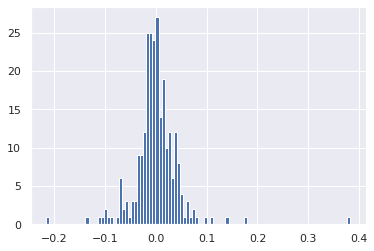

In [51]:
import seaborn as sns
sns.set()
# histogram dziennych zmian
df_2.change.hist(bins = 100)

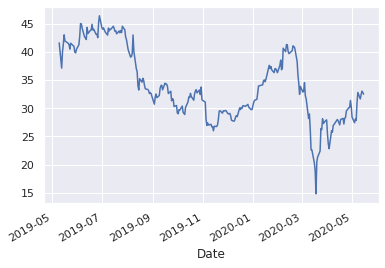

In [52]:
# wykres cen zamknięcia
df_2.Close.plot()

In [59]:
# filtrowanie danych
# wycięcie tych wierszy (dni) w których, dzienna zmiana jest na plus

# maska która zwaraca Flase/ True
df_2.change > 0 
# wyciecie tylko wartosci dodatnich
df_positive = df_2[df_2.change > 0]
print(df_positive)
# średnia dodatnia stopa zwrotu
print(df_positive.change.mean())

             Open     High  Close    Volume     avg    change
Date                                                         
2019-05-14  38.31  39.9600  39.96  46661147  39.135  0.077089
2019-05-15  39.37  41.8800  41.29  36086065  40.330  0.033283
2019-05-16  41.48  44.0600  43.00  38115524  42.240  0.041414
2019-05-24  41.28  41.5100  41.51   8786751  41.395  0.025698
2019-05-31  41.15  41.5700  40.41  23209848  40.780  0.015327
...           ...      ...    ...       ...     ...       ...
2020-05-05  28.25  28.9088  28.07  30725371  28.160  0.023705
2020-05-07  29.60  31.6500  30.93  62229496  30.265  0.111790
2020-05-08  32.59  33.3000  32.79  69525793  32.690  0.060136
2020-05-12  31.42  34.4500  32.40  89585967  31.910  0.024020
2020-05-13  32.30  33.0600  33.02  47279487  32.660  0.019136

[119 rows x 6 columns]
0.03017584144827854


In [65]:
# sprawdzenie czy była sytuacja w której cena Close
# była równa cenie high
df_2.Close == df_2.High
df_2[df_2.Close == df_2.High]

,Open,High,Close,Volume,avg,change
Date,,,,,,
2019-05-14,38.31,39.96,39.96,46661147,39.135,0.077089
2019-05-24,41.28,41.51,41.51,8786751,41.395,0.025698


In [67]:
# wycianie sesji po 1 listopada 2019
df_2[df_2.index > '2019-11-01']

,Open,High,Close,Volume,avg,change
Date,,,,,,
2019-11-04,31.45,31.7500,31.08,32330121,31.265,-0.009245
2019-11-05,29.13,29.3000,28.02,52180615,28.575,-0.098456
2019-11-06,26.06,27.5500,26.94,133569790,26.500,-0.038544
2019-11-07,26.80,27.4200,27.38,65949472,27.090,0.016333
2019-11-08,27.48,27.6200,27.01,45263118,27.245,-0.013514
...,...,...,...,...,...,...
2020-05-11,31.98,32.3850,31.64,26439191,31.810,-0.035072
2020-05-12,31.42,34.4500,32.40,89585967,31.910,0.024020
2020-05-13,32.30,33.0600,33.02,47279487,32.660,0.019136


In [68]:
df_2

,Open,High,Close,Volume,avg,change
Date,,,,,,
2019-05-10,42.00,45.0000,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.2400,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.9600,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.8800,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.0600,43.00,38115524,42.240,0.041414
...,...,...,...,...,...,...
2020-05-11,31.98,32.3850,31.64,26439191,31.810,-0.035072
2020-05-12,31.42,34.4500,32.40,89585967,31.910,0.024020
2020-05-13,32.30,33.0600,33.02,47279487,32.660,0.019136


In [69]:
# łaczenie warunków zamiast and  używamy & zamiast or używamy |
df_2[ (df_2.index >= '2019-11-01') & (df_2.index <= '2019-11-15')  ]

,Open,High,Close,Volume,avg,change
Date,,,,,,
2019-11-01,31.45,31.70,31.37,10460430,31.410,-0.004127
2019-11-04,31.45,31.75,31.08,32330121,31.265,-0.009245
2019-11-05,29.13,29.30,28.02,52180615,28.575,-0.098456
2019-11-06,26.06,27.55,26.94,133569790,26.500,-0.038544
2019-11-07,26.80,27.42,27.38,65949472,27.090,0.016333
2019-11-08,27.48,27.62,27.01,45263118,27.245,-0.013514
2019-11-11,27.03,27.21,27.14,41445732,27.085,0.004813
2019-11-12,27.38,27.66,26.70,37095389,27.040,-0.016212
2019-11-13,26.47,26.82,26.71,34512663,26.590,0.000375


In [72]:
# jeszcze jeden sposób wycinania po miesiacu
df_2[df_2.index.month == 5]
#  w przypadku roku dodtkowo
# df_2[.index.year == 2019]

,Open,High,Close,Volume,avg,change
Date,,,,,,
2019-05-10,42.00,45.0000,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.2400,37.10,79442420,37.945,-0.107529
2019-05-14,38.31,39.9600,39.96,46661147,39.135,0.077089
2019-05-15,39.37,41.8800,41.29,36086065,40.330,0.033283
2019-05-16,41.48,44.0600,43.00,38115524,42.240,0.041414
2019-05-17,41.98,43.2900,41.91,20225687,41.945,-0.025349
2019-05-20,41.19,41.6800,41.59,29222330,41.390,-0.007635
2019-05-21,42.00,42.2400,41.50,10802851,41.750,-0.002164
2019-05-22,41.05,41.2800,41.25,9089469,41.150,-0.006024
